# Unsupervised Learning (Advanced Clustering)

For this lab we will use Scikit-Learn’s API, sklearn.datasets, which allows us to access a famous dataset for linguistic analysis, the 20newsgroups dataset. A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

More details about the dataset: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

Your task is to perform clustering on the given dataset. 

**Submission: submit via onq.** 


##Read Dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['category'] = dataset.data
df['Target'] = dataset.target

##Data Exploration

In [ ]:
df.shape

(2852, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2852 non-null   object
 1   Target    2852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.7+ KB


In [ ]:
df.head()

,category,Target
0,I just moved from Borland C++ 3.0 to Visual C+...,2
1,\n: \tNice cop out bill.\n\nI'm sure you're ri...,0
2,I'm attempting to transfer files from my home ...,2
3,\nThen not murdering would have no moral signi...,0
4,\nI could give much the same testimonial about...,0


In [ ]:
df.describe()

,Target
count,2852.000000
mean,2.088710
std,1.386227
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [ ]:
df.isnull().sum()

category    0
Target      0
dtype: int64

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated(subset = None)

0       False
1       False
2       False
3       False
4       False
        ...  
2847    False
2848    False
2849    False
2850    False
2851    False
Length: 2852, dtype: bool

In [ ]:
df[df.duplicated(subset = None)]

,category,Target
42,,1
276,,1
364,,3
373,\n,3
378,,1
...,...,...
2729,,3
2734,,4
2769,,3
2789,,2


In [ ]:
#checking for number of duplications
df.duplicated().sum()

72

In [ ]:
# dropping ALL duplicate values
df = df.drop_duplicates()

In [ ]:
df.shape

(2780, 2)

In [ ]:
df['Target'].value_counts()

4    588
3    578
1    573
2    571
0    470
Name: Target, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

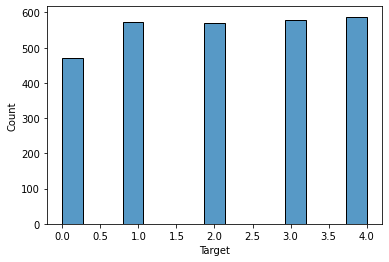

In [ ]:
plt.figure()
sns.histplot(df['Target'])
plt.show()

##Data cleaning

In [ ]:
import nltk
import re

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
#Text cleaning
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    #remove whitespaces
    text = re.sub(r"\s+", " ", text)
    #remove tags
    text = re.sub(r"<[^>]+>", " ", text)
    #ASCII
    text = re.sub(r"[^A-Za-z]", " ", text)
    #remove SINGLECHAR
    text = re.sub(r"\b[A-Za-z]\b", " ", text)
    # remove links
    text = re.sub(r"http\S+", " ", text)
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]
    words_filtered=[stemmer.stem(word) for word in words_tokens_lower if word not in stop_words]
    text_clean = ' '.join(words_filtered)
    return text_clean

In [ ]:
df['category_clean'] = df['category'].apply(preprocess_text)

In [ ]:
df.head()

,category,Target,category_clean
0,I just moved from Borland C++ 3.0 to Visual C+...,2,move borland visual today tri compil program c...
1,\n: \tNice cop out bill.\n\nI'm sure you're ri...,0,nice cop bill sure right idea refer would mind...
2,I'm attempting to transfer files from my home ...,2,attempt transfer file home comput run window t...
3,\nThen not murdering would have no moral signi...,0,murder would moral signific sinc would noth vo...
4,\nI could give much the same testimonial about...,0,could give much testimoni experi scout back is...


create vector representation of each document using TF-IDF encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2")

In [ ]:
tfidf_vect_result=tfidf_vectorizer.fit_transform(df["category_clean"])

In [ ]:
# Vector representation of vocabulary
word_vector = pd.Series(tfidf_vectorizer.vocabulary_).sample(10, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 applic                129
diamond speedstar     719
sever                2504
hawgood              1215
poulin               2132
knee                 1479
app                   124
folk                 1024
red sox              2296
singl                2551
dtype: int64


##Kmeans and Kmeans++

Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means 

In [ ]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization. 
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

In [ ]:
import sklearn
from sklearn.cluster import KMeans

###KMeans

In [ ]:
KM = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 200, tol = 1e-0)
KM.fit(tfidf_vect_result)

KMeans(init='random', max_iter=200, n_clusters=5, tol=1.0)

In [ ]:
print('#iterations >>>>> ', KM.n_iter_)
print('predicted labels >>>>> ',KM.labels_)

#iterations >>>>>  12
predicted labels >>>>>  [0 0 2 ... 3 0 4]


In [ ]:
import sklearn.metrics as metrics
print("Homogeneity >>>>> %0.3f" % metrics.homogeneity_score(df["Target"], KM.labels_))
print("Completeness >>>>> %0.3f" % metrics.completeness_score(df["Target"], KM.labels_))
print("V-measure >>>>> %0.3f" % metrics.v_measure_score(df["Target"], KM.labels_))
print("Silhouette Coefficient >>>>> %0.3f"
      % metrics.silhouette_score(tfidf_vect_result, KM.labels_, sample_size=1000))
mutual_info_score_plus=metrics.mutual_info_score(df["Target"], KM.labels_)
print("mutual_info_score_plus_plus >>>>> ",mutual_info_score_plus)

Homogeneity: 0.365
Completeness: 0.392
V-measure: 0.378
Silhouette Coefficient: 0.008
mutual_info_score_plus_plus 0.5866808162490376


###KMeans++

In [ ]:
KM_plus = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 200, tol = 1e-0)
KM_plus.fit(tfidf_vect_result)

KMeans(max_iter=200, n_clusters=5, tol=1.0)

In [ ]:
print('#iterations >>>>> ', KM_plus.n_iter_)
print('predicted labels >>>>> ',KM_plus.labels_)

#iterations >>>>>  12
predicted labels >>>>>  [3 4 3 ... 1 4 3]


In [ ]:
import sklearn.metrics as metrics
print("Homogeneity >>>>> %0.3f" % metrics.homogeneity_score(df["Target"], KM_plus.labels_))
print("Completeness >>>>> %0.3f" % metrics.completeness_score(df["Target"], KM_plus.labels_))
print("V-measure >>>>> %0.3f" % metrics.v_measure_score(df["Target"], KM_plus.labels_))
print("Silhouette Coefficient >>>>> %0.3f"
      % metrics.silhouette_score(tfidf_vect_result, KM_plus.labels_, sample_size=1000))
mutual_info_score_plus=metrics.mutual_info_score(df["Target"], KM_plus.labels_)
print("mutual_info_score_plus_plus >>>>>",mutual_info_score_plus)

Homogeneity: 0.378
Completeness: 0.414
V-measure: 0.395
Silhouette Coefficient: 0.008
mutual_info_score_plus_plus 0.6067455285123855


###KMeans With TruncatedSVD 

Task 5: perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA (from sklearn.decomposition import PCA), or other methods. 

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA

In [83]:
tfidf_vect_result_SVD = TruncatedSVD(n_components = 2).fit_transform(tfidf_vect_result)

In [84]:
KM_SVD = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 200, tol = 1e-0)
KM_SVD.fit(tfidf_vect_result_SVD)

KMeans(init='random', max_iter=200, n_clusters=5, tol=1.0)

In [85]:
print('#iterations >>>>> ', KM_SVD.n_iter_)
print('predicted labels >>>>> ',KM_SVD.labels_)

#iterations >>>>>  2
predicted labels >>>>>  [2 1 3 ... 0 4 2]


In [87]:
import sklearn.metrics as metrics
print("Homogeneity >>>>> %0.3f" % metrics.homogeneity_score(df["Target"], KM_SVD.labels_))
print("Completeness >>>>> %0.3f" % metrics.completeness_score(df["Target"], KM_SVD.labels_))
print("V-measure >>>>> %0.3f" % metrics.v_measure_score(df["Target"], KM_SVD.labels_))
print("Silhouette Coefficient >>>>> %0.3f"
      % metrics.silhouette_score(tfidf_vect_result, KM_SVD.labels_, sample_size=1000))
mutual_info_score_plus=metrics.mutual_info_score(df["Target"], KM_SVD.labels_)
print("mutual_info_score_plus_plus >>>>> ",mutual_info_score_plus)

Homogeneity >>>>> 0.279
Completeness >>>>> 0.285
V-measure >>>>> 0.282
Silhouette Coefficient >>>>> 0.003
mutual_info_score_plus_plus >>>>>  0.44876298939668535


###KMeans++ With TruncatedSVD 

In [88]:
tfidf_vect_result_SVD = TruncatedSVD(n_components = 2).fit_transform(tfidf_vect_result)

In [89]:
KM_plus_SVD = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 200, tol = 1e-0)
KM_plus_SVD.fit(tfidf_vect_result_SVD)

KMeans(max_iter=200, n_clusters=5, tol=1.0)

In [90]:
print('#iterations >>>>> ', KM_plus_SVD.n_iter_)
print('predicted labels >>>>> ',KM_plus_SVD.labels_)

#iterations >>>>>  1
predicted labels >>>>>  [0 4 2 ... 3 4 0]


In [91]:
import sklearn.metrics as metrics
print("Homogeneity >>>>> %0.3f" % metrics.homogeneity_score(df["Target"], KM_plus_SVD.labels_))
print("Completeness >>>>> %0.3f" % metrics.completeness_score(df["Target"], KM_plus_SVD.labels_))
print("V-measure >>>>> %0.3f" % metrics.v_measure_score(df["Target"], KM_plus_SVD.labels_))
print("Silhouette Coefficient >>>>> %0.3f"
      % metrics.silhouette_score(tfidf_vect_result, KM_plus_SVD.labels_, sample_size=1000))
mutual_info_score_plus=metrics.mutual_info_score(df["Target"], KM_plus_SVD.labels_)
print("mutual_info_score_plus_plus >>>>> ",mutual_info_score_plus)

Homogeneity >>>>> 0.281
Completeness >>>>> 0.289
V-measure >>>>> 0.285
Silhouette Coefficient >>>>> 0.003
mutual_info_score_plus_plus >>>>>  0.45176145502446996


###Performance comparison

Task 6: compare the performance of the above four approaches on the given dataset using mutual information based scores: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html 

In [93]:
print('K-means score >>>>> ', metrics.mutual_info_score(df["Target"],KM.labels_))
print('K-mean++ score >>>>> ',metrics.mutual_info_score(df["Target"],KM_plus.labels_))
print('K-means With TruncatedSVD score >>>>> ',metrics.mutual_info_score(df["Target"],KM_SVD.labels_))
print('K-means++ With TruncatedSVD score >>>>> ',metrics.mutual_info_score(df["Target"],KM_plus_SVD.labels_))

K-means score >>>>>  0.5866808162490376
K-mean++ score >>>>>  0.6067455285123855
K-means With TruncatedSVD score >>>>>  0.44876298939668535
K-means++ With TruncatedSVD score >>>>>  0.45176145502446996


###Using Elbow to  select best K (Number of clusters)

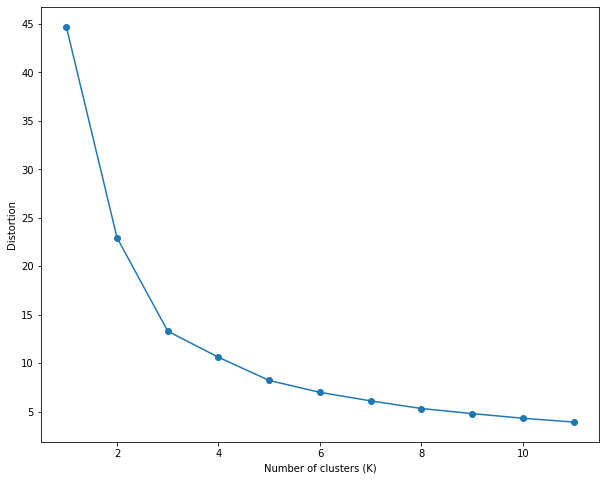

In [97]:
distortions = []
for i in range(1, 12):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=200,
        tol=1e-04
    )
    km.fit(tfidf_vect_result_SVD)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1, 12), distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.show()

best number of clusters (K) is >>>>>  5